<a href="https://colab.research.google.com/github/OnsongoMabeya/Convolutional-Neural-Network-for-Handwritten-Digit-Classification-Using-the-MNIST-Dataset/blob/main/Week_14_ML_Make_Up_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Machine Learning - Make Up



- John Onsongo Mabeya - 664404
---
- **Makeup Question: Task: Develop a machine learning pipeline to classify images of handwritten digits (0-9) using the MNIST dataset**

## 1. Load and preprocess the MNIST dataset, ensuring the images are normalized and reshaped appropriately

- First, we need to load the MNIST dataset and preprocess it by normalizing the pixel values and reshaping the images.

In [1]:
# Import necessary libraries
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

- Load the dataset

In [3]:
# Load the MNIST dataset, which is split into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
y_train.shape

(60000,)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

---
- Normalize the images to the range [0, 1]

In [12]:
# Normalize the images to the range [0, 1] by converting pixel values from integers (0-255) to floats (0.0-1.0)
X_train = X_train.astype('float32') / 255

In [13]:
X_test = X_test.astype('float32') / 255

In [14]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [15]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

---
- Reshape the images to add a channel dimension (28, 28, 1)

In [16]:
# Reshape the images to add a channel dimension (28, 28, 1) for compatibility with CNN input
X_train = X_train.reshape((-1, 28, 28, 1))

In [17]:
X_test = X_test.reshape((-1, 28, 28, 1))

In [18]:
X_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [19]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

---
- Convert labels to one-hot encoding

In [20]:
# Convert labels to one-hot encoding for categorical classification
y_train = to_categorical(y_train, num_classes=10)

In [21]:
y_test = to_categorical(y_test, num_classes=10)

In [22]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [23]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

---
## 2. Implement a Convolutional Neural Network (CNN) using TensorFlow or PyTorch to classify the images.

- Next, we will build a CNN model using TensorFlow's Keras API.

In [24]:
# Import necessary layers for the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

---
- Define the CNN model

In [25]:
model = Sequential([
    # First convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Max pooling layer to reduce spatial dimensions
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer with 64 filters, kernel size of 3x3, and ReLU activation
    Conv2D(64, kernel_size=(3, 3), activation='relu'),

    # Second Max pooling layer to reduce spatial dimensions
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output from the convolutional layers to feed into the dense layers
    Flatten(),

    # First dense layer with 128 units and ReLU activation
    Dense(128, activation='relu'),

    # Dropout layer to prevent overfitting
    Dropout(0.5),

    # Output layer with 10 units (one for each digit) and softmax activation for multi-class classification
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---
- Compile the model

In [26]:
# Compile the model with Adam optimizer and categorical crossentropy loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

---
## 3. Train the model and evaluate its accuracy on the test set.

- We will now train the model on the training dataset and evaluate its performance on the test dataset.

---
- Train the model

In [27]:
# Train the model on the training dataset, using 20% of the data for validation
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.7686 - loss: 0.7271 - val_accuracy: 0.9748 - val_loss: 0.0824
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 97ms/step - accuracy: 0.9624 - loss: 0.1260 - val_accuracy: 0.9842 - val_loss: 0.0549
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9742 - loss: 0.0861 - val_accuracy: 0.9859 - val_loss: 0.0463
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 95ms/step - accuracy: 0.9777 - loss: 0.0716 - val_accuracy: 0.9863 - val_loss: 0.0469
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.9804 - loss: 0.0614 - val_accuracy: 0.9876 - val_loss: 0.0408
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 96ms/step - accuracy: 0.9853 - loss: 0.0508 - val_accuracy: 0.9889 - val_loss: 0.0369
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 98ms/step - accuracy: 0.9854 - loss: 0.0459 - val_accuracy: 0.9898 - val_loss: 0.0393
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 0.9863 - loss: 0.0401 

In [28]:
history

---
- Let us evaluate the model

In [29]:
# Evaluate the model on the test dataset and print the test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9887 - loss: 0.0326


In [30]:
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.9912999868392944


In [31]:
print(f'Test loss: {test_loss}')

Test loss: 0.027604125440120697


---
## 4. Visualize the performance of the model by plotting a confusion matrix.

- To visualize the performance of the model, we can plot a confusion matrix using the predictions made by the model.

In [32]:
# Import necessary libraries for visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

---
First let us make the predictions

In [33]:
# Make predictions on the test dataset
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [34]:
# Convert predictions and true labels from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

In [35]:
y_true_classes = np.argmax(y_test, axis=1)

In [36]:
y_pred

array([[7.15721915e-13, 6.66084271e-11, 1.15992806e-10, ...,
        9.99999940e-01, 1.46185390e-11, 1.15144216e-09],
       [3.13361959e-08, 2.77668155e-09, 9.99999940e-01, ...,
        1.02263026e-13, 8.06802181e-10, 9.99268756e-14],
       [8.00110367e-10, 9.99998510e-01, 4.80711293e-09, ...,
        2.38783429e-07, 6.57769448e-08, 7.49152296e-10],
       ...,
       [8.25194635e-18, 8.77259654e-11, 1.58810966e-13, ...,
        2.09431274e-11, 4.71971455e-11, 3.79365601e-11],
       [3.33847755e-10, 6.66460593e-13, 1.56144436e-15, ...,
        3.56525925e-13, 1.32813293e-03, 2.54245042e-10],
       [2.74476299e-08, 5.70813258e-11, 5.76710191e-09, ...,
        1.00979403e-15, 1.89305926e-09, 8.29301837e-14]], dtype=float32)

In [37]:
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6])

In [38]:
y_true_classes

array([7, 2, 1, ..., 4, 5, 6])

---
- Let us compute the confusion matrix

In [39]:
# Compute the confusion matrix to evaluate the performance of the model
cm = confusion_matrix(y_true_classes, y_pred_classes)

In [40]:
cm

array([[ 976,    0,    0,    0,    1,    0,    1,    1,    1,    0],
       [   0, 1131,    0,    1,    0,    0,    1,    2,    0,    0],
       [   1,    0, 1024,    0,    1,    0,    0,    5,    1,    0],
       [   0,    0,    2, 1000,    0,    2,    0,    3,    3,    0],
       [   0,    0,    0,    0,  980,    0,    1,    0,    0,    1],
       [   1,    0,    0,    5,    0,  881,    1,    1,    2,    1],
       [   4,    2,    0,    0,    1,    1,  949,    0,    1,    0],
       [   0,    3,    4,    0,    0,    0,    0, 1019,    1,    1],
       [   1,    0,    1,    1,    0,    0,    0,    3,  966,    2],
       [   2,    2,    0,    0,    7,    2,    0,    6,    3,  987]])

---
- With that let us plot the confusion matrix

In [41]:
# Plot the confusion matrix using Matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.arange(10))

In [42]:
display_labels = np.arange(10)

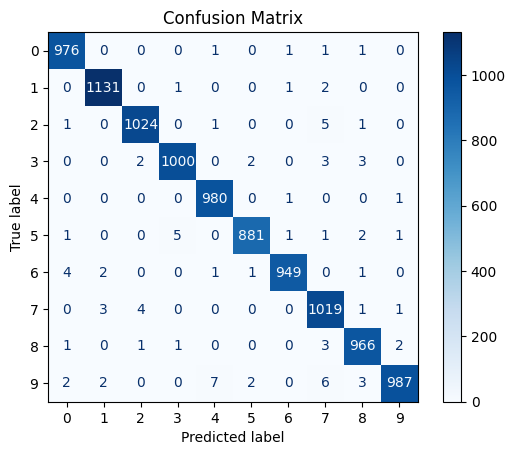

In [44]:
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

---
## 5. Discuss potential improvements in the model architecture or training process to increase accuracy.

To further enhance the model's accuracy, consider the following potential improvements:
1. **Data Augmentation**: Introduce techniques such as rotation, zoom, and shifts to artificially increase the size of the training dataset. This can help the model generalize better.
2. **Regularization Techniques**: Implement L2 regularization or dropout layers to prevent overfitting, especially if the training accuracy is significantly higher than the test accuracy.
3. **Hyperparameter Tuning**: Experiment with different architectures, learning rates, batch sizes, and the number of epochs to find the optimal configuration.
4. **Advanced Architectures**: Explore deeper CNN architectures or transfer learning using pre-trained models like VGG or ResNet, which may yield better results.
5. **Ensemble Methods**: Combine predictions from multiple models to improve overall accuracy.

By implementing these strategies, we can enhance the performance of our CNN model for classifying handwritten digits from the MNIST dataset.